# Source code for the Final Project: Classifying Brain Tumor from the Data Set



### 2015129053 Hyoung Chul Kim



In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



I used these codes to show the data I am using. It is basically brain image of the patients: 

### Image of the Brain Images of the Patients


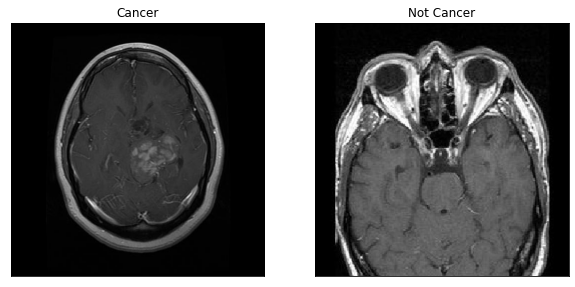

In [2]:
upic='Brain_Tumor_Data/Brain_Tumor/Cancer (1).jpg'
apic='Brain_Tumor_Data/Healthy/Not Cancer  (1).jpg'
plt.figure(1, figsize = (10 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Cancer')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Not Cancer')
plt.xticks([]) , plt.yticks([])

plt.show()

Now I divided the dataset into two folders (training and testing) and use 20% of the data as the testing(validation) data:

### Dividing Dataset into two folders train and test

In [3]:
width = 128
height = 128
generated_data = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [4]:
trainData_gen = generated_data.flow_from_directory(directory='Brain_Tumor_Data/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 3681 images belonging to 2 classes.


In [5]:
validData_gen = generated_data.flow_from_directory(directory='Brain_Tumor_Data/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 919 images belonging to 2 classes.


In [17]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


In [18]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 40, 40, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                409632    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [20]:
# model fit
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [21]:
# report accuracy from training/test data
history=model.fit(trainData_gen, epochs = 10,
                 validation_data=validData_gen)

Epoch 1/10
231/231 [==============================] - 25s 106ms/step - loss: 0.5263 - accuracy: 0.7304 - val_loss: 0.4062 - val_accuracy: 0.7998
Epoch 2/10
231/231 [==============================] - 23s 98ms/step - loss: 0.2646 - accuracy: 0.8935 - val_loss: 0.2729 - val_accuracy: 0.9032
Epoch 3/10
231/231 [==============================] - 23s 97ms/step - loss: 0.1713 - accuracy: 0.9345 - val_loss: 0.1244 - val_accuracy: 0.9489
Epoch 4/10
231/231 [==============================] - 24s 103ms/step - loss: 0.0994 - accuracy: 0.9634 - val_loss: 0.0948 - val_accuracy: 0.9641
Epoch 5/10
231/231 [==============================] - 25s 110ms/step - loss: 0.0491 - accuracy: 0.9836 - val_loss: 0.1054 - val_accuracy: 0.9608
Epoch 6/10
231/231 [==============================] - 25s 110ms/step - loss: 0.0454 - accuracy: 0.9830 - val_loss: 0.0693 - val_accuracy: 0.9771
Epoch 7/10
231/231 [==============================] - 27s 115ms/step - loss: 0.0410 - accuracy: 0.9855 - val_loss: 0.0847 - val_accu

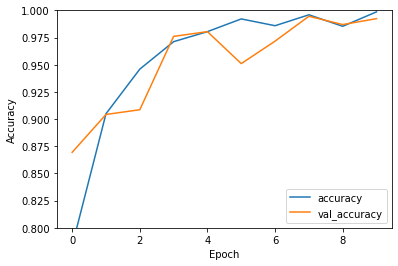

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='lower right')

In [7]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(25, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [8]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 30)      840       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 25)        6775      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 20)               

In [10]:
# model fit
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



After I ran the "history=model.fit" (10 epochs), the accuracy was around 0.9891.

In [11]:
# report accuracy from training/test data
history=model.fit(trainData_gen, epochs = 10,
                 validation_data=validData_gen)

Epoch 1/10
231/231 [==============================] - 18s 78ms/step - loss: 0.5610 - accuracy: 0.7136 - val_loss: 0.3890 - val_accuracy: 0.8390
Epoch 2/10
231/231 [==============================] - 18s 77ms/step - loss: 0.2965 - accuracy: 0.8817 - val_loss: 0.1821 - val_accuracy: 0.9238
Epoch 3/10
231/231 [==============================] - 18s 78ms/step - loss: 0.1764 - accuracy: 0.9346 - val_loss: 0.1231 - val_accuracy: 0.9543
Epoch 4/10
231/231 [==============================] - 18s 78ms/step - loss: 0.1173 - accuracy: 0.9548 - val_loss: 0.1518 - val_accuracy: 0.9369
Epoch 5/10
231/231 [==============================] - 18s 78ms/step - loss: 0.0894 - accuracy: 0.9734 - val_loss: 0.0686 - val_accuracy: 0.9826
Epoch 6/10
231/231 [==============================] - 17s 72ms/step - loss: 0.0614 - accuracy: 0.9796 - val_loss: 0.1005 - val_accuracy: 0.9619
Epoch 7/10
231/231 [==============================] - 16s 71ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0385 - val_accuracy:

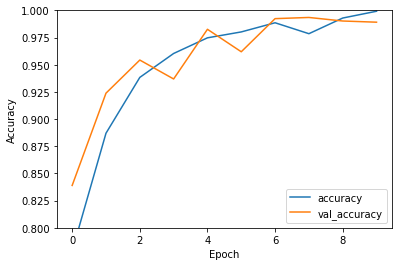

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='lower right')

In [6]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


In [7]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                409632    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

In [9]:
# model fit
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# report accuracy from training/test data
history=model.fit(trainData_gen, epochs = 10,
                 validation_data=validData_gen)

Epoch 1/10
231/231 [==============================] - 27s 116ms/step - loss: 0.8866 - accuracy: 0.5157 - val_loss: 0.6891 - val_accuracy: 0.5462
Epoch 2/10
231/231 [==============================] - 26s 111ms/step - loss: 0.6880 - accuracy: 0.5547 - val_loss: 0.6893 - val_accuracy: 0.5462
Epoch 3/10
231/231 [==============================] - 25s 108ms/step - loss: 0.6913 - accuracy: 0.5385 - val_loss: 0.6891 - val_accuracy: 0.5462
Epoch 4/10
231/231 [==============================] - 25s 109ms/step - loss: 0.6903 - accuracy: 0.5432 - val_loss: 0.6889 - val_accuracy: 0.5462
Epoch 5/10
231/231 [==============================] - 26s 114ms/step - loss: 0.6910 - accuracy: 0.5415 - val_loss: 0.6889 - val_accuracy: 0.5462
Epoch 6/10
231/231 [==============================] - 26s 112ms/step - loss: 0.6875 - accuracy: 0.5566 - val_loss: 0.6905 - val_accuracy: 0.5462
Epoch 7/10
231/231 [==============================] - 26s 112ms/step - loss: 0.6884 - accuracy: 0.5571 - val_loss: 0.6889 - val_ac

In [15]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (3, 3), activation='tanh', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(25, (3,3), activation='tanh'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [16]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 30)      840       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 25)        6775      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)               

In [18]:
# model fit
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# report accuracy from training/test data
history=model.fit(trainData_gen, epochs = 10,
                 validation_data=validData_gen)

Epoch 1/10
231/231 [==============================] - 20s 84ms/step - loss: 0.5969 - accuracy: 0.6647 - val_loss: 0.3141 - val_accuracy: 0.8618
Epoch 2/10
231/231 [==============================] - 18s 78ms/step - loss: 0.2735 - accuracy: 0.8917 - val_loss: 0.1775 - val_accuracy: 0.9293
Epoch 3/10
231/231 [==============================] - 18s 79ms/step - loss: 0.1622 - accuracy: 0.9432 - val_loss: 0.0932 - val_accuracy: 0.9641
Epoch 4/10
231/231 [==============================] - 18s 80ms/step - loss: 0.0714 - accuracy: 0.9791 - val_loss: 0.1021 - val_accuracy: 0.9554
Epoch 5/10
231/231 [==============================] - 19s 81ms/step - loss: 0.0364 - accuracy: 0.9908 - val_loss: 0.0933 - val_accuracy: 0.9597
Epoch 6/10
231/231 [==============================] - 19s 81ms/step - loss: 0.0356 - accuracy: 0.9902 - val_loss: 0.0417 - val_accuracy: 0.9848
Epoch 7/10
231/231 [==============================] - 19s 81ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0298 - val_accuracy:

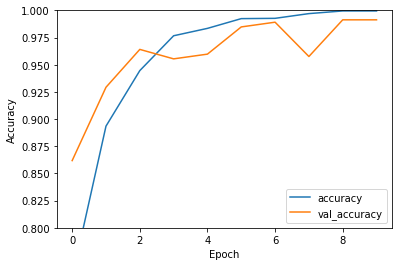

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='lower right')

In [29]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (3, 3), activation='tanh', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(25, (3,3), activation='tanh'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(15, (4,4), activation='tanh'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [30]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 30)      840       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 42, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 25)        6775      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 25)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 15)        6015      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 15)         

In [31]:
# model fit
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# report accuracy from training/test data
history=model.fit(trainData_gen, epochs = 10,
                 validation_data=validData_gen)

Epoch 1/10
231/231 [==============================] - 20s 86ms/step - loss: 0.6446 - accuracy: 0.6046 - val_loss: 0.3665 - val_accuracy: 0.8368
Epoch 2/10
231/231 [==============================] - 20s 86ms/step - loss: 0.3440 - accuracy: 0.8484 - val_loss: 0.2659 - val_accuracy: 0.8879
Epoch 3/10
231/231 [==============================] - 20s 87ms/step - loss: 0.2135 - accuracy: 0.9128 - val_loss: 0.1868 - val_accuracy: 0.9249
Epoch 4/10
231/231 [==============================] - 20s 88ms/step - loss: 0.1545 - accuracy: 0.9385 - val_loss: 0.1263 - val_accuracy: 0.9608
Epoch 5/10
231/231 [==============================] - 20s 85ms/step - loss: 0.0938 - accuracy: 0.9691 - val_loss: 0.1366 - val_accuracy: 0.9336
Epoch 6/10
231/231 [==============================] - 22s 96ms/step - loss: 0.0745 - accuracy: 0.9743 - val_loss: 0.0624 - val_accuracy: 0.9804
Epoch 7/10
231/231 [==============================] - 28s 122ms/step - loss: 0.0405 - accuracy: 0.9901 - val_loss: 0.0583 - val_accuracy

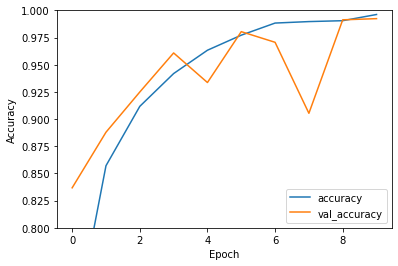

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='lower right')

In [32]:
# report accuracy from training/test data
history=model.fit(trainData_gen, epochs = 15,
                 validation_data=validData_gen)

Epoch 1/15
231/231 [==============================] - 22s 92ms/step - loss: 0.6189 - accuracy: 0.6385 - val_loss: 0.3293 - val_accuracy: 0.8618
Epoch 2/15
231/231 [==============================] - 25s 108ms/step - loss: 0.3301 - accuracy: 0.8551 - val_loss: 0.2602 - val_accuracy: 0.8825
Epoch 3/15
231/231 [==============================] - 94s 407ms/step - loss: 0.2276 - accuracy: 0.9090 - val_loss: 0.1694 - val_accuracy: 0.9304
Epoch 4/15
231/231 [==============================] - 27s 118ms/step - loss: 0.1596 - accuracy: 0.9416 - val_loss: 0.1100 - val_accuracy: 0.9641
Epoch 5/15
231/231 [==============================] - 22s 97ms/step - loss: 0.0973 - accuracy: 0.9693 - val_loss: 0.1852 - val_accuracy: 0.9271
Epoch 6/15
231/231 [==============================] - 27s 118ms/step - loss: 0.0958 - accuracy: 0.9625 - val_loss: 0.0574 - val_accuracy: 0.9804
Epoch 7/15
231/231 [==============================] - 34s 149ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0549 - val_accu

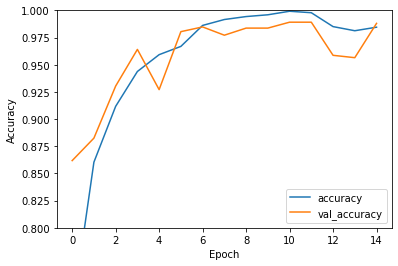

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='lower right')

### References

1. Dataset used: https://www.kaggle.com/preetviradiya/brian-tumor-dataset
        
2. CNN code adopted and revised from: Homework 5 from the "Deep Learning" class in Yonsei University Spring Semester 2021.